In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load or create a 256x256 grayscale image
image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

# Resize to 256x256
image = cv2.resize(image, (256, 256))

In [14]:
# Function to apply low-pass filter in frequency domain
def dft_lowpass_filter(img, cutoff=30, pad=False):
    rows, cols = img.shape

    # Padding for frequency resolution
    if pad:
        nrows, ncols = rows*2, cols*2
        padded_img = cv2.copyMakeBorder(img, 0, nrows - rows, 0, ncols - cols, cv2.BORDER_CONSTANT, value=0)
    else:
        nrows, ncols = rows, cols
        padded_img = img

    # Perform DFT on the padded image
    dft = cv2.dft(np.float32(padded_img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft, axes=[0,1])

    # Create circular low-pass filter mask
    crow, ccol = nrows//2, ncols//2
    mask = np.zeros((nrows, ncols, 2), np.float32)
    y, x = np.ogrid[:nrows, :ncols]
    mask_area = (x - ccol)**2 + (y - crow)**2 <= cutoff**2
    mask[mask_area] = 1

    # Apply mask
    fshift = dft_shift * mask

    # Inverse DFT
    f_ishift = np.fft.ifftshift(fshift, axes=[0,1])
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

    # Crop back if padded
    if pad:
        img_back = img_back[:rows, :cols]

    return img_back


In [15]:
# Apply filtering
filtered_no_pad = dft_lowpass_filter(image, cutoff=30, pad=False)
filtered_pad = dft_lowpass_filter(image, cutoff=30, pad=True)


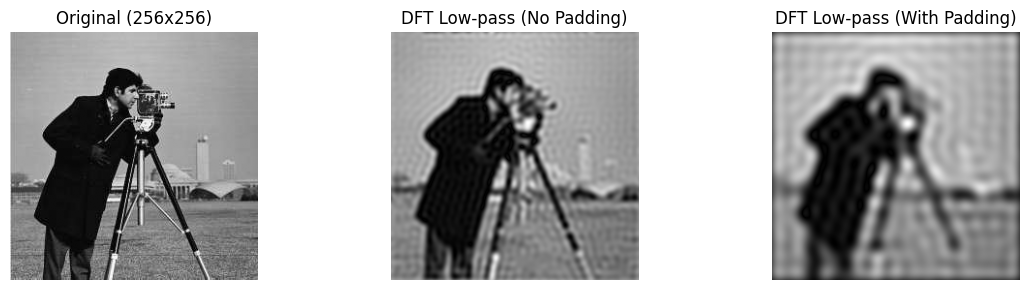

In [16]:
# Display results 
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original (256x256)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(filtered_no_pad, cmap='gray')
plt.title("DFT Low-pass (No Padding)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(filtered_pad, cmap='gray')
plt.title("DFT Low-pass (With Padding)")
plt.axis('off')

plt.tight_layout()
plt.show()
